In [35]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [36]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False , class_sep=10)

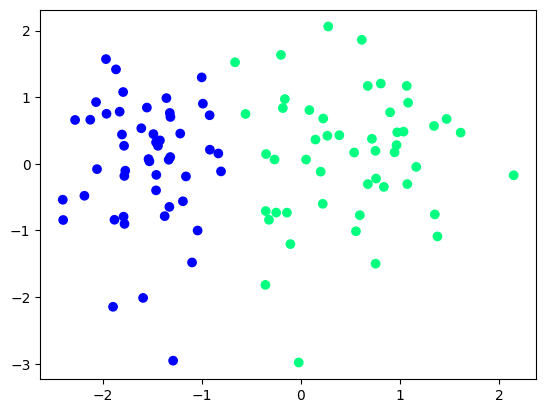

In [37]:
plt.scatter(X[: , 0] , X[: , 1] , c=y , cmap = "winter")

In [38]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1 
    for j in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
    
    return weights[0] , weights[1:]

In [39]:
def step(z):
    return 1 if z>0 else 0

Coeff is :  [1.29642255 0.20150907]
Intercept is :  0.9


(-3.0, 2.0)

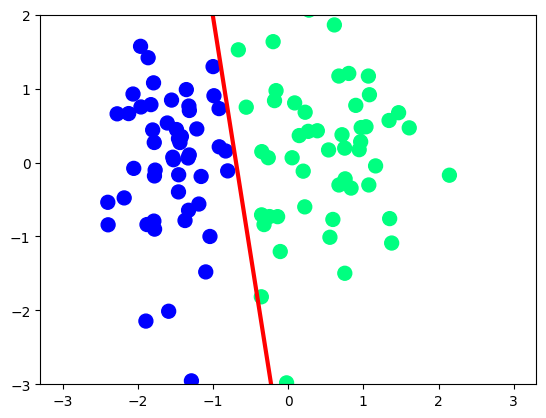

In [40]:
intercept , coeff = perceptron(X,y)

print("Coeff is : " , coeff)
print("Intercept is : " , intercept)

m = -(coeff[0]/coeff[1])
b = -(intercept / coeff[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.plot(x_input , y_input , color = 'red' , linewidth = 3)
plt.scatter(X[:,0] , X[:,  1] ,c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Doing it through scikit learn 

In [41]:
from sklearn.linear_model import LogisticRegression 
lor = LogisticRegression()
lor.fit(X,y)


LogisticRegression()

In [42]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

(-3.0, 2.0)

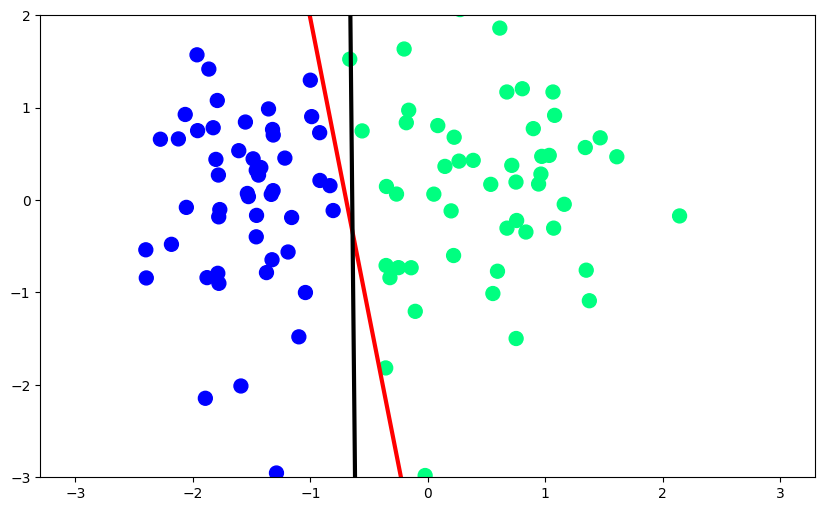

In [43]:

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Now doing it through perceptron with sigmoid function

In [44]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [45]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [46]:
intercept_,coef_ = perceptron(X,y)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])


x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

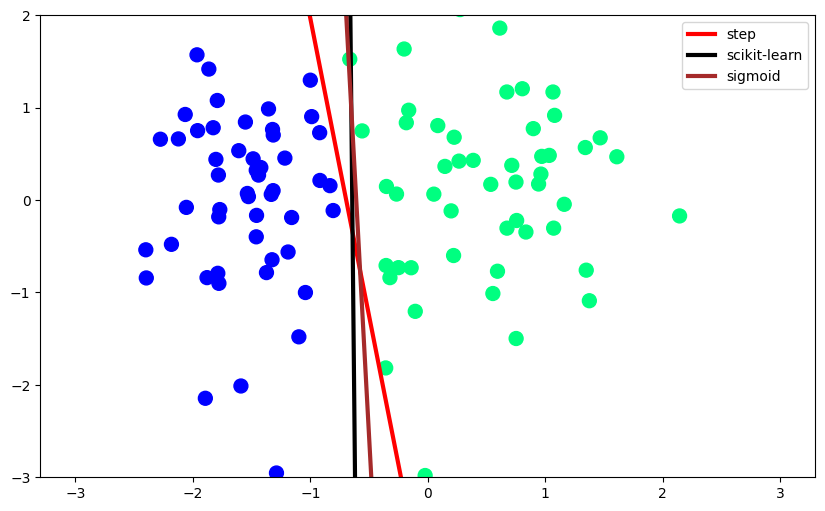

In [47]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3 , label = "step")
plt.plot(x_input1,y_input1,color='black',linewidth=3 , label = "scikit-learn")
plt.plot(x_input2,y_input2,color='brown',linewidth=3 , label = "sigmoid")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()    